<div style="background-color:#1A237E;color:#FFEB3B;padding:20px;border:1px solid #3F51B5;text-align:center;">
<p><font size="14" color=#FFF9C4 face="Lora"><i> Loan Approval Prediction (Banking Domain) </i></font> </p>
</div>

## Problem Statement:
#### Given the features about the customer like `Age, Income, Loan amount etc.,.`
#### Predict if in case the loan is given, will the customer `default or not on the Loan payments.`
#### Task - Prepare the Data and build a model to predict the customer default or not on the Loan payments.

### Feature Name and Description
- person_age                 :  Age
- person_income              :  Annual Income
- person_home_ownership      :  Home ownership
- person_emp_length          :  Employment length (in years)
- loan_intent                :  Loan intent
- loan_grade                 :  Loan grade
- loan_amnt                  :  Loan amount
- loan_int_rate              :  Interest rate
- loan_percent_income        :  Percent income
- cb_person_default_on_file  :  Historical default
- cb_preson_cred_hist_length :  Credit history length
- loan_status                :  Loan status (0 is non default 1 is default) and it is our target variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config Inlinebackend.figure_format='retina'

### Load the DataSet

In [2]:
loan = pd.read_csv("D:\Data\Machine_Learning\credit_risk_dataset.csv", skipinitialspace=True)

In [3]:
loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
loan.shape

(32581, 12)

## Data Cleaning

In [5]:
loan.duplicated()
loan.duplicated().value_counts()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

False    32416
True       165
dtype: int64

In [6]:
loan[loan.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
loan.drop_duplicates(keep='first', inplace=True)

In [8]:
# Checking the shape because whether the duplicates droped or not.
loan.shape

(32416, 12)

In [9]:
loan.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

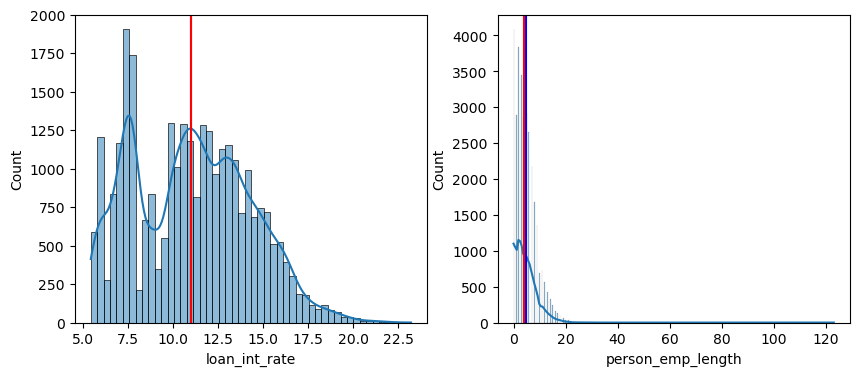

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(loan.loan_int_rate, kde = True)
plt.axvline(loan.loan_int_rate.mean(), color = 'blue')
plt.axvline(loan.loan_int_rate.median(), color = 'red');

plt.subplot(122)
sns.histplot(loan.person_emp_length, kde = True)
plt.axvline(loan.person_emp_length.mean(), color = 'blue')
plt.axvline(loan.person_emp_length.median(), color = 'red');

In [11]:
# filling the null values with the median of that column using fillna().
loan.person_emp_length.fillna(loan.person_emp_length.median(), inplace=True)

loan.loan_int_rate.fillna(loan.loan_int_rate.median(), inplace=True)

In [12]:
loan.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
# To Check Identifying is there any the Corrupted values are present or not.
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [14]:
# Descriptive Statisticts
loan.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.014662,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.090411,6322.730241,3.083050,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Identifying the Outliers

In [15]:
print('Mean:')
loan.mean()
print('='*30)
print('Median:')
loan.median()
print('='*30)
print('skewness:')
loan.skew()
print('='*30)
print('kurtosis:')
loan.kurt()

Mean:


person_age                       27.747008
person_income                 66091.640826
person_emp_length                 4.768880
loan_amnt                      9593.845632
loan_int_rate                    11.014662
loan_status                       0.218688
loan_percent_income               0.170250
cb_person_cred_hist_length        5.811297
dtype: float64

Median:


person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_status                       0.00
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64

skewness:


person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

kurtosis:


person_age                      18.560231
person_income                 2701.116241
person_emp_length               45.093628
loan_amnt                        1.421251
loan_int_rate                   -0.426731
loan_status                     -0.147220
loan_percent_income              1.217690
cb_person_cred_hist_length       3.705835
dtype: float64

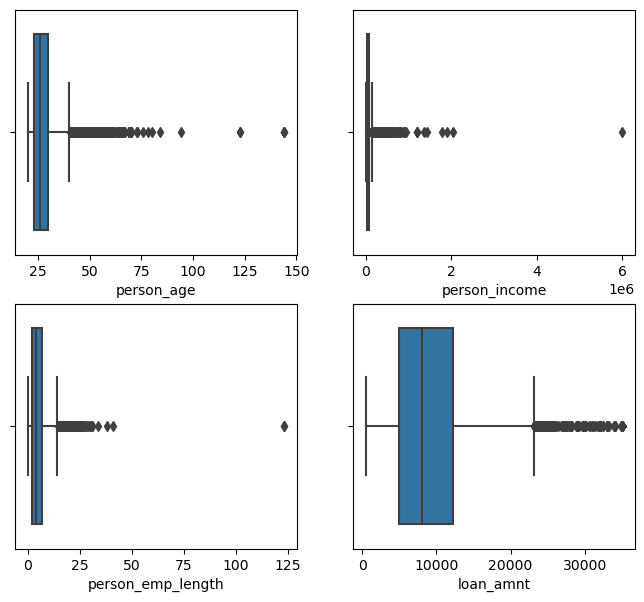

In [16]:
plt.figure(figsize=(8,7))

plt.subplot(221)
sns.boxplot(x = loan.person_age)

plt.subplot(222)
sns.boxplot(x = loan.person_income)

plt.subplot(223)
sns.boxplot(x = loan.person_emp_length)

plt.subplot(224)
sns.boxplot(x = loan.loan_amnt);

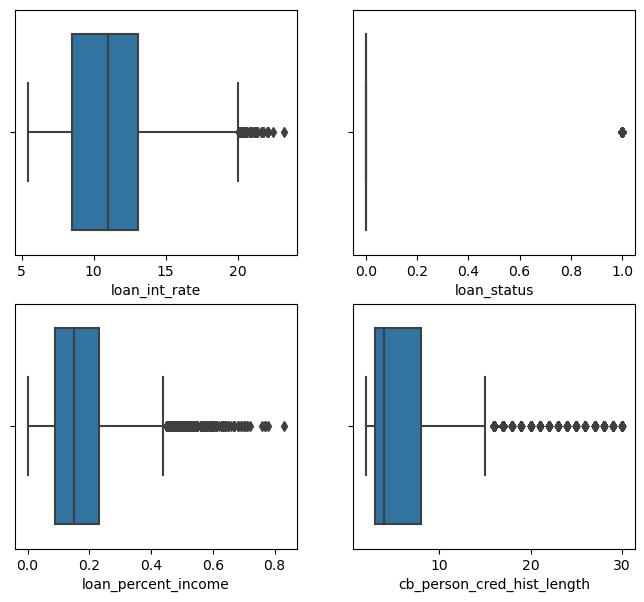

In [17]:
plt.figure(figsize=(8,7))
plt.subplot(221)
sns.boxplot(x = loan.loan_int_rate)

plt.subplot(222)
sns.boxplot(x = loan.loan_status)

plt.subplot(223)
sns.boxplot(x = loan.loan_percent_income)

plt.subplot(224)
sns.boxplot(x = loan.cb_person_cred_hist_length);

In [18]:
# Run two times to Eliminate the outliers
Q1, Q2, Q3 = tuple(loan.loan_amnt.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

drop_list = loan[(loan.loan_amnt > UL) | (loan.loan_amnt < LL)].index.tolist()
loan.drop(drop_list, axis=0, inplace=True)
loan.reset_index(drop=True)

5000.0 8000.0 12250.0
7250.0 23125.0 -5875.0


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
3,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
4,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30732,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
30733,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
30734,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
30735,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


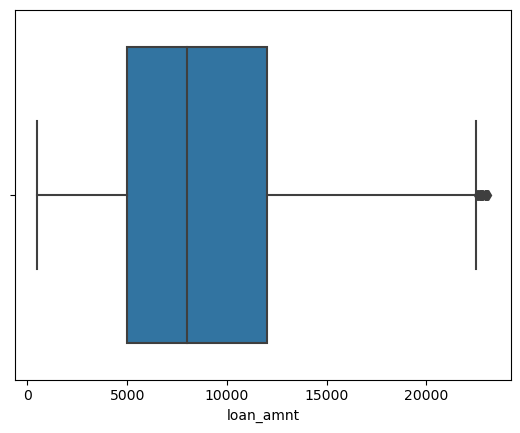

In [19]:
sns.boxplot(x = loan.loan_amnt);

In [20]:
Q4, Q5, Q6 = tuple(loan.person_income.quantile(q = [0.25,0.5,0.75]).values)
print(Q4, Q5, Q6)

IQR = Q6-Q4
UL = Q6 + 1.5*IQR
LL = Q4-1.5*IQR

print(IQR, UL, LL)

drop_list1 = loan[(loan.person_income > UL) | (loan.person_income < LL)].index.tolist()
loan.drop(drop_list1, axis=0, inplace=True)
loan.reset_index(drop=True)

37876.0 54000.0 75000.0
37124.0 130686.0 -17810.0


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
3,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
4,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29333,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
29334,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
29335,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
29336,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19


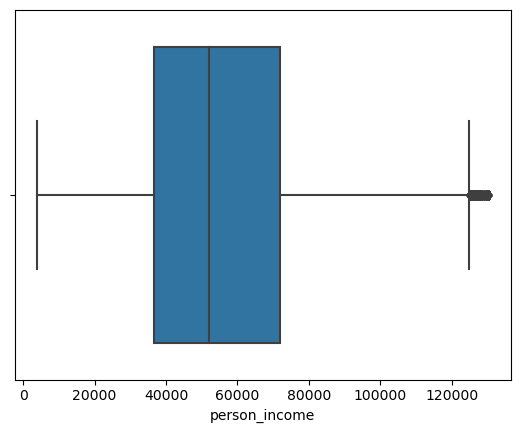

In [21]:
sns.boxplot(x = loan.person_income);

## Exploratory Data Analysis

In [22]:
loan.loan_status.value_counts()

0    22961
1     6377
Name: loan_status, dtype: int64

In [23]:
loan.loan_status.value_counts(normalize=True)

0    0.782637
1    0.217363
Name: loan_status, dtype: float64

- Non loan defaulters are more or high compared to the loan defaulters.

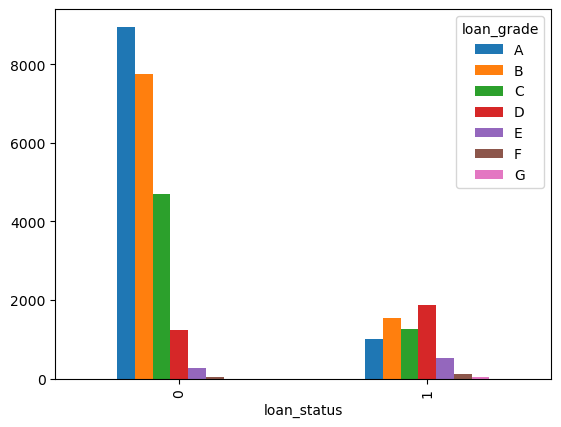

In [24]:
pd.crosstab(index=loan.loan_status, 
            columns=loan.loan_grade).plot(kind='bar');

In [25]:
loan.cb_person_default_on_file.value_counts(normalize=True)

N    0.8263
Y    0.1737
Name: cb_person_default_on_file, dtype: float64

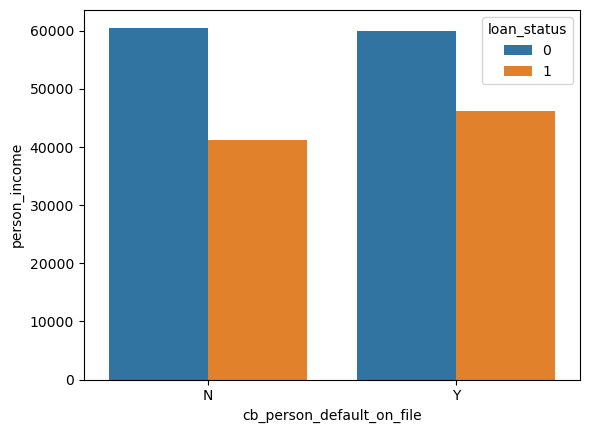

In [26]:
sns.barplot(x=loan.cb_person_default_on_file,y=loan.person_income, hue=loan.loan_status, ci=False);

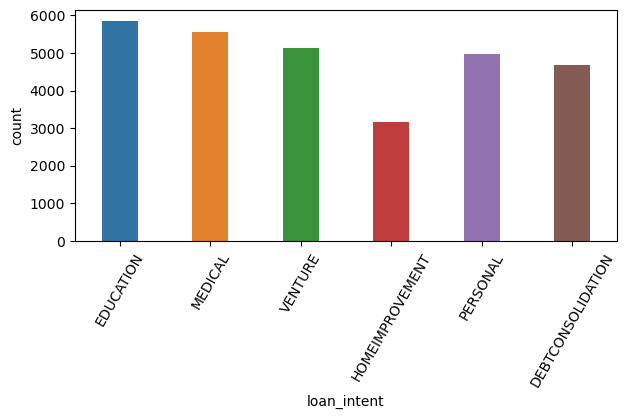

In [27]:
plt.figure(figsize=(7,3))
plt.xticks(rotation=60)
sns.countplot(x= loan.loan_intent, width=0.4);

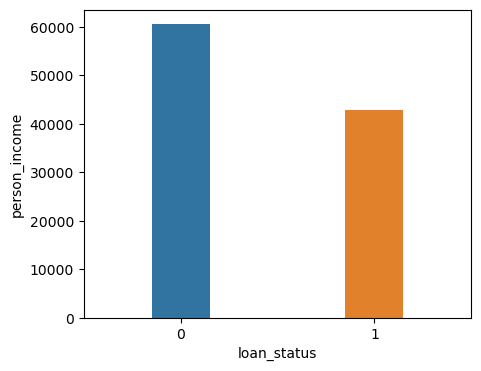

In [28]:
plt.figure(figsize=(5,4))
sns.barplot(x= loan.loan_status, y=loan.person_income,width=0.3, ci=False);

- Comparing to the loan status and person income the non-loan defaulters has more person income compared to the loan defaulters

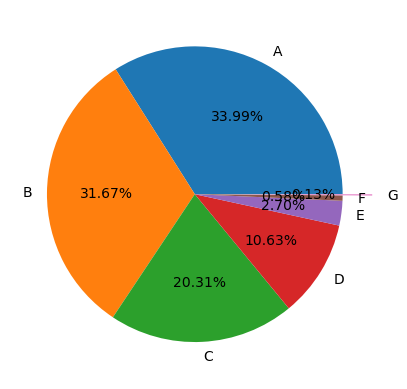

In [29]:
plt.pie(x=loan.loan_grade.value_counts().values, labels=loan.loan_grade.value_counts().index,
        autopct='%.2f%%', explode = [0, 0, 0, 0, 0, 0,0.2]);

- A-grade and B-grade are more compared to other grade 

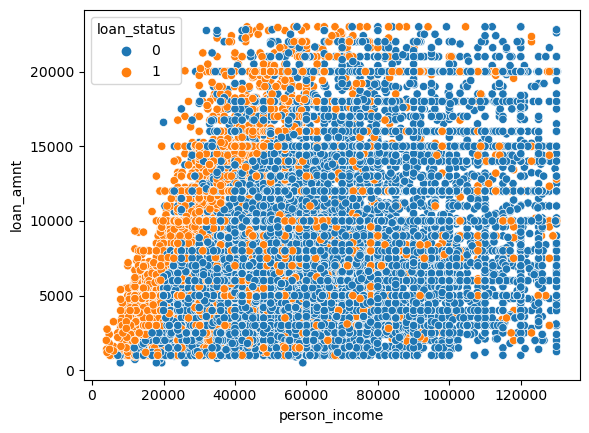

In [30]:
sns.scatterplot(x=loan.person_income,y=loan.loan_amnt, hue=loan.loan_status);

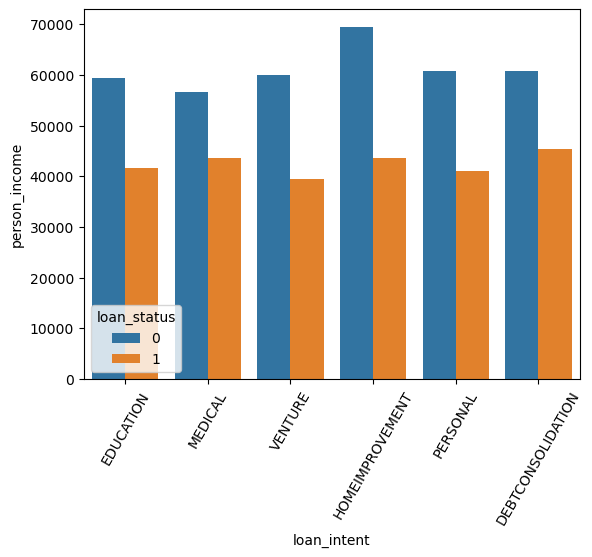

In [31]:
plt.xticks(rotation=60)
sns.barplot(y=loan.person_income, x= loan.loan_intent, hue=loan.loan_status ,ci= False);

- In the Homeimprovement sector non-loan defaulters has more person income compared other non-loan defaulters.
- In the Debtconsolidation loan defaulters has more person income compared to other loan defaulters.

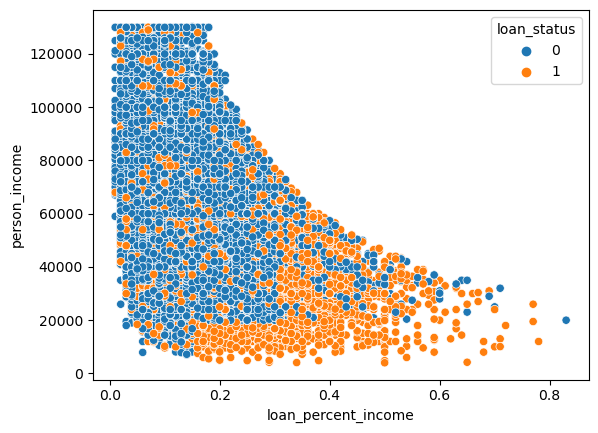

In [32]:
sns.scatterplot(x=loan.loan_percent_income, y= loan.person_income, hue=loan.loan_status);

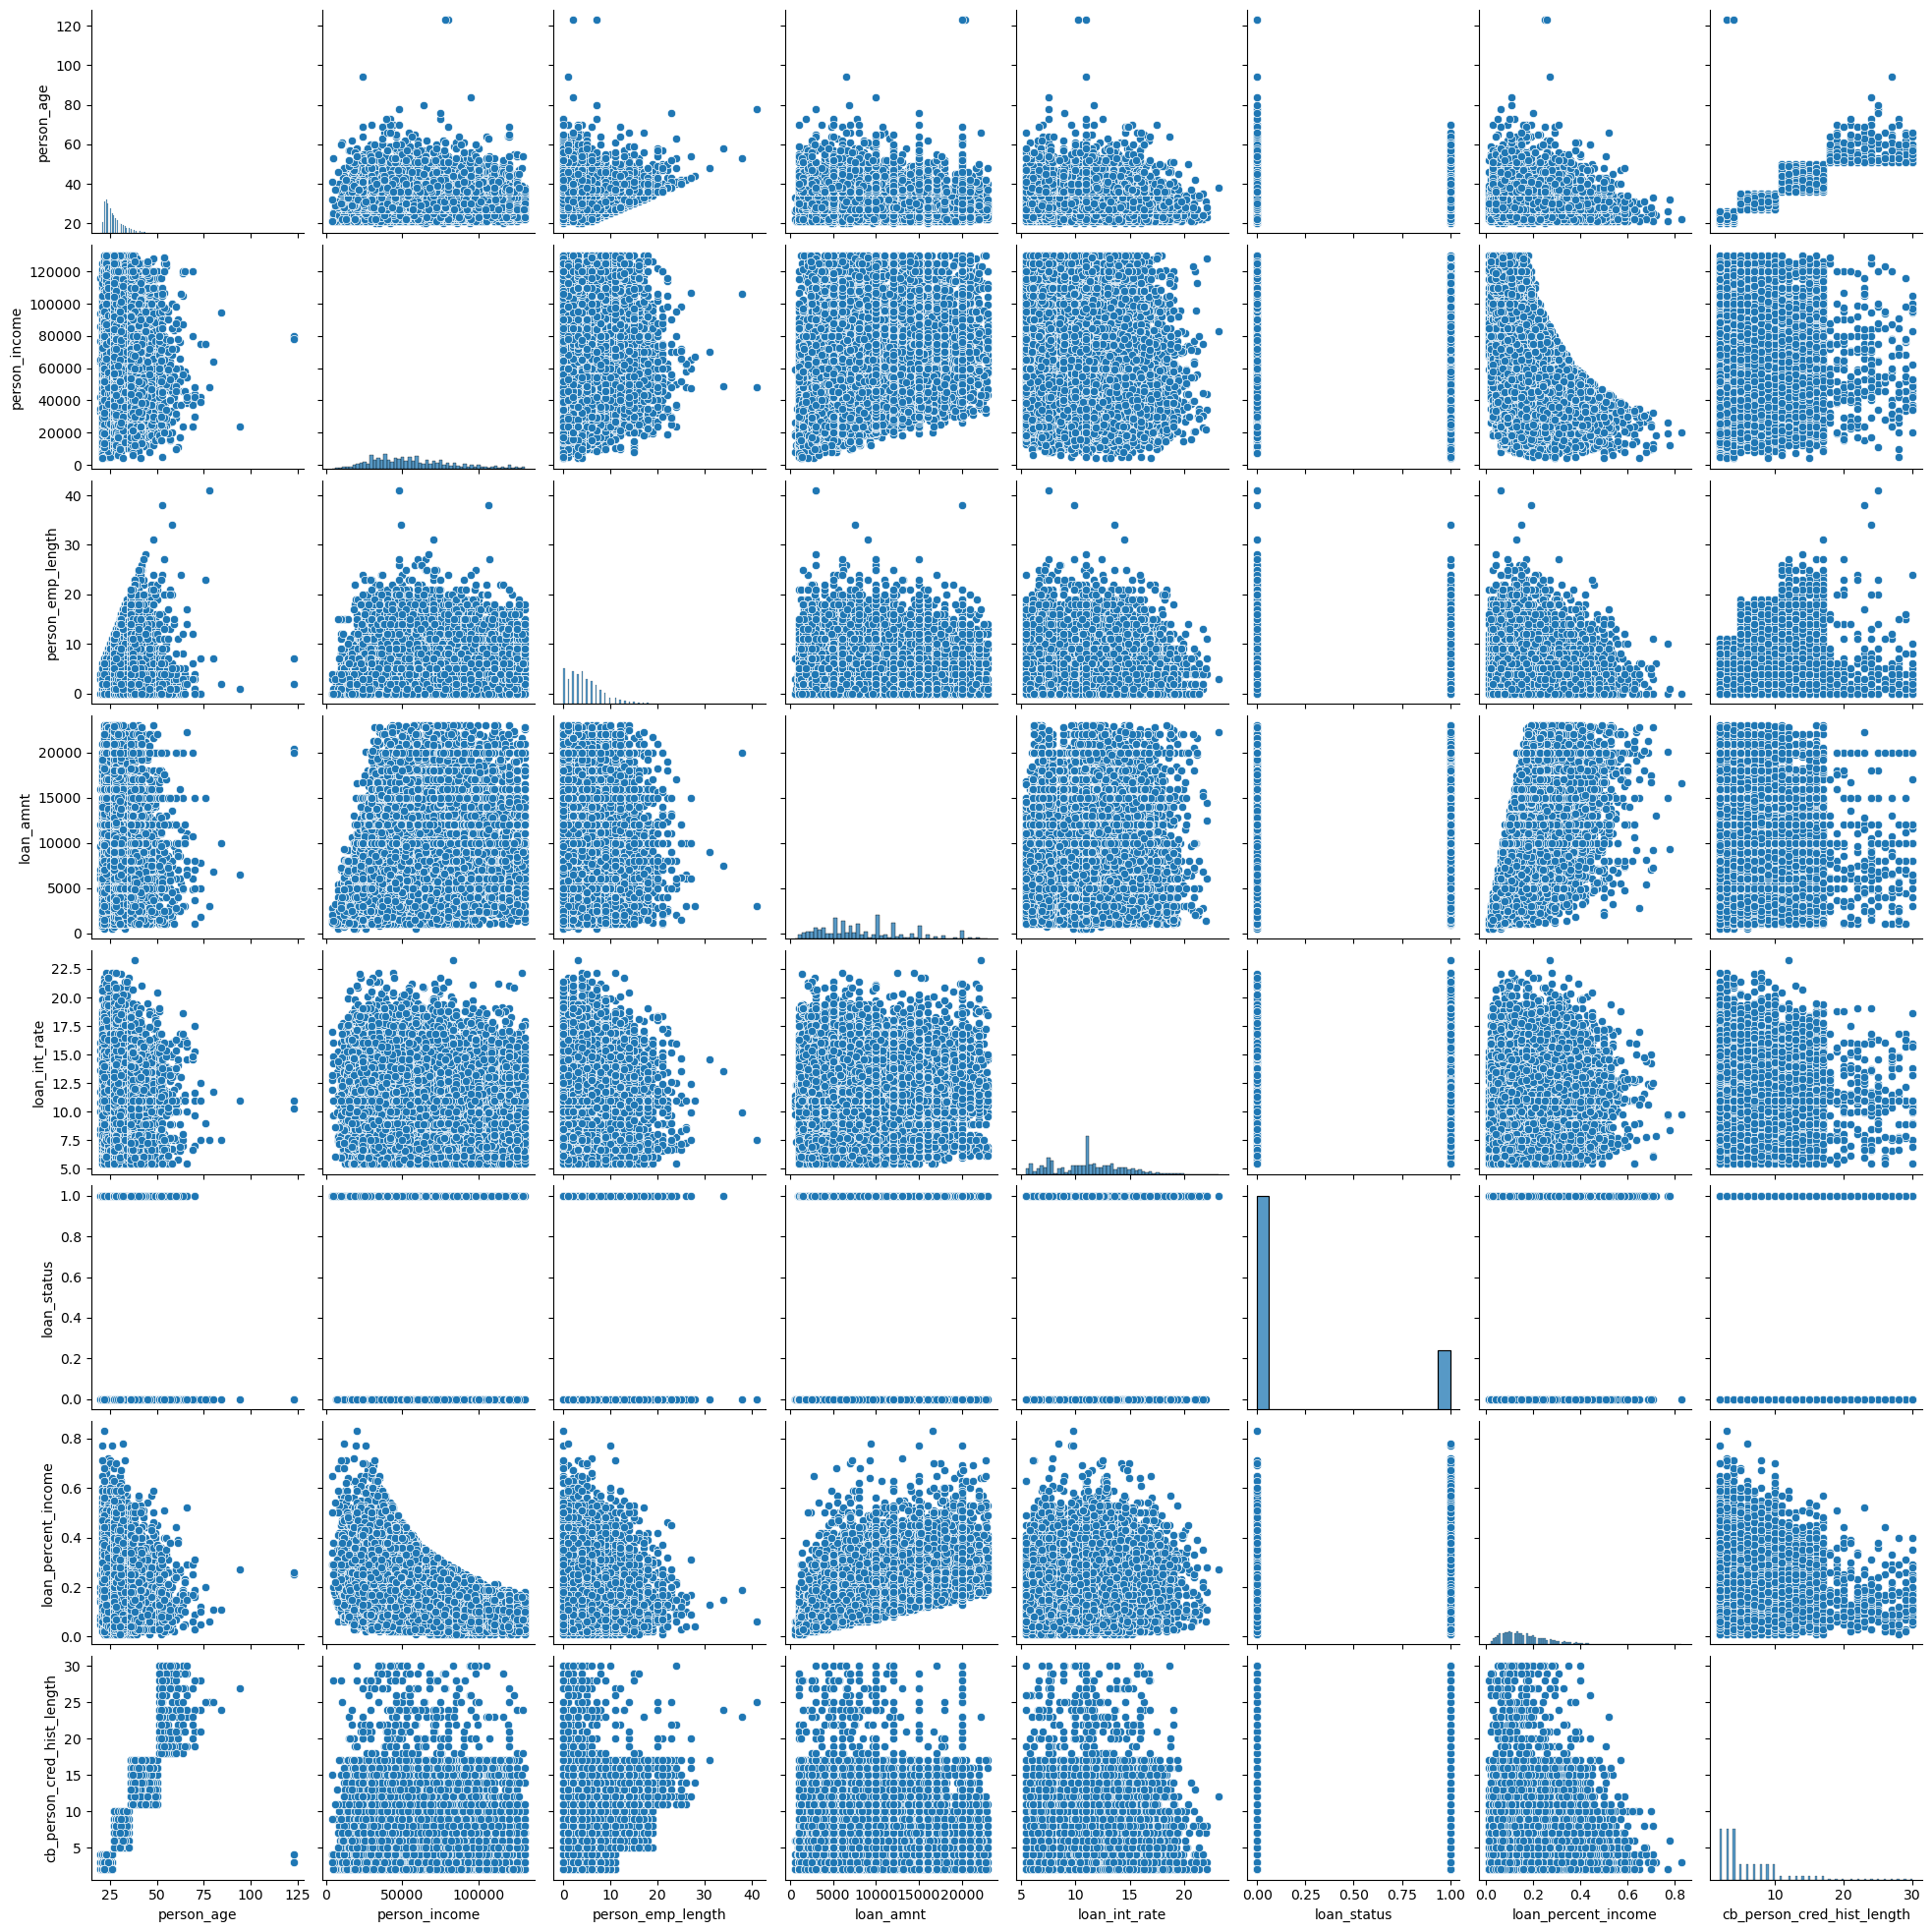

In [33]:
sns.pairplot(loan);

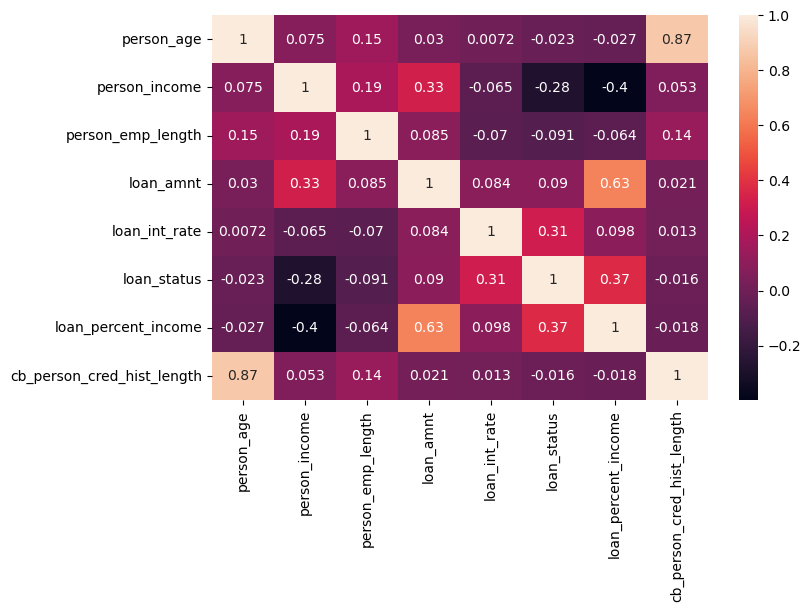

In [34]:
plt.figure(figsize=(8,5))
sns.heatmap(loan.corr(), annot=True);

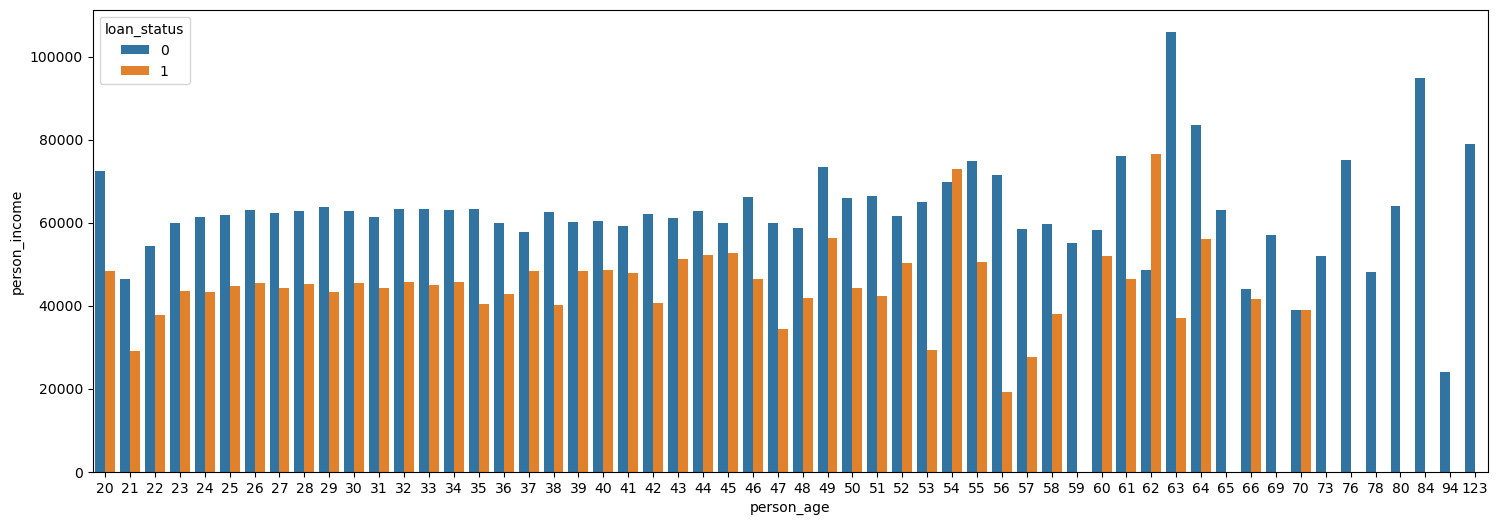

In [35]:
plt.figure(figsize=(18,6))
sns.barplot(x=loan.person_age, y= loan.person_income, hue=loan.loan_status, ci=False);

# Data Preparation
### Identifying the Input and Output Variables

In [36]:
loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [37]:
X = loan[['person_age', 'person_income', 'person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 
           'loan_amnt', 'loan_int_rate', 'loan_percent_income','cb_person_default_on_file', 'cb_person_cred_hist_length']]
y = loan['loan_status']

### Separating the train and test data

In [38]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state = 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22003, 11) (22003,)
(7335, 11) (7335,)


In [39]:
X_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29307,40,50004,RENT,3.0,DEBTCONSOLIDATION,B,20000,10.99,0.40,N,17
512,24,19000,OWN,3.0,MEDICAL,C,7400,13.85,0.39,N,2
6950,25,50400,MORTGAGE,5.0,HOMEIMPROVEMENT,B,12000,9.62,0.24,N,4
6502,23,50000,MORTGAGE,3.0,EDUCATION,A,10000,6.03,0.20,N,4
1641,21,51000,RENT,0.0,HOMEIMPROVEMENT,D,1500,15.58,0.03,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
12720,22,68496,RENT,4.0,PERSONAL,D,12000,15.31,0.18,Y,3
26484,34,103363,MORTGAGE,4.0,DEBTCONSOLIDATION,B,15000,10.99,0.15,N,8
14927,24,25920,OWN,4.0,EDUCATION,D,3250,15.99,0.13,Y,4
25303,27,83000,MORTGAGE,11.0,VENTURE,C,2500,13.99,0.03,Y,8


### Separating Categorical and Numerical Columns on Train data

In [40]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29307,40,50004,3.0,20000,10.99,0.40,17
512,24,19000,3.0,7400,13.85,0.39,2
6950,25,50400,5.0,12000,9.62,0.24,4
6502,23,50000,3.0,10000,6.03,0.20,4
1641,21,51000,0.0,1500,15.58,0.03,4


In [41]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
29307,RENT,DEBTCONSOLIDATION,B,N
512,OWN,MEDICAL,C,N
6950,MORTGAGE,HOMEIMPROVEMENT,B,N
6502,MORTGAGE,EDUCATION,A,N
1641,RENT,HOMEIMPROVEMENT,D,Y
...,...,...,...,...
12720,RENT,PERSONAL,D,Y
26484,MORTGAGE,DEBTCONSOLIDATION,B,N
14927,OWN,EDUCATION,D,Y
25303,MORTGAGE,VENTURE,C,Y


### Rescaling the Numerical Features

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                      columns= X_train_num.columns,
                                      index= X_train_num.index)

X_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29307,2.001717,-0.254088,-0.418257,2.335970,0.018992,2.232594,2.815681
512,-0.574206,-1.456429,-0.418257,-0.224133,0.959063,2.135957,-0.928030
6950,-0.413211,-0.238731,0.095786,0.710508,-0.431322,0.686402,-0.428869
6502,-0.735201,-0.254243,-0.418257,0.304142,-1.611341,0.299854,-0.428869
1641,-1.057192,-0.215463,-1.189321,-1.422911,1.527707,-1.342975,-0.428869


### Separating the Categorical for the Label Encoding and One Hot Encoding for the train data

In [43]:
X_train_cat_ohe = X_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_train_cat_le = X_train_cat['loan_grade']

In [44]:
X_train_cat_ohe.head()
X_train_cat_le.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
29307,RENT,DEBTCONSOLIDATION,N
512,OWN,MEDICAL,N
6950,MORTGAGE,HOMEIMPROVEMENT,N
6502,MORTGAGE,EDUCATION,N
1641,RENT,HOMEIMPROVEMENT,Y


29307    B
512      C
6950     B
6502     A
1641     D
Name: loan_grade, dtype: object

In [45]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
29307
512
6950
6502
1641


In [46]:
map_dict = {'A': 7,'B': 6,'C': 5,'D': 4,'E': 3,'F': 2, 'G': 1}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : map_dict[x])

In [47]:
X_train_cat_le.head()

,loan_grade
29307,6
512,5
6950,6
6502,7
1641,4


In [48]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_cat_ohe_rescaled = pd.DataFrame(encoder.fit_transform(X_train_cat_ohe), 
                               columns=encoder.get_feature_names_out(X_train_cat_ohe.columns), 
                               index = X_train_cat_ohe.index)

X_train_cat_ohe_rescaled.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
29307,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6950,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1641,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
29307,2.001717,-0.254088,-0.418257,2.335970,0.018992,2.232594,2.815681,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
512,-0.574206,-1.456429,-0.418257,-0.224133,0.959063,2.135957,-0.928030,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5
6950,-0.413211,-0.238731,0.095786,0.710508,-0.431322,0.686402,-0.428869,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
6502,-0.735201,-0.254243,-0.418257,0.304142,-1.611341,0.299854,-0.428869,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
1641,-1.057192,-0.215463,-1.189321,-1.422911,1.527707,-1.342975,-0.428869,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4


### Separating the Numerical and Categorical on the test data

In [50]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16196,22,115000,MORTGAGE,6.0,EDUCATION,A,12000,5.99,0.10,N,3
21058,31,53922,RENT,15.0,HOMEIMPROVEMENT,B,5000,10.59,0.09,N,5
635,26,54996,RENT,8.0,EDUCATION,B,20000,12.18,0.36,N,4
15955,24,7000,RENT,2.0,MEDICAL,C,1000,10.99,0.14,N,2
7237,22,115200,RENT,0.0,DEBTCONSOLIDATION,A,7000,7.66,0.06,N,2


In [51]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
16196,22,115000,6.0,12000,5.99,0.10,3
21058,31,53922,15.0,5000,10.59,0.09,5
635,26,54996,8.0,20000,12.18,0.36,4
15955,24,7000,2.0,1000,10.99,0.14,2
7237,22,115200,0.0,7000,7.66,0.06,2


In [52]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
16196,MORTGAGE,EDUCATION,A,N
21058,RENT,HOMEIMPROVEMENT,B,N
635,RENT,EDUCATION,B,N
15955,RENT,MEDICAL,C,N
7237,RENT,DEBTCONSOLIDATION,A,N


### Applying the Transformation techniques on test data

In [53]:
# Rescaling the test Numerical data.
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
16196,-0.896197,2.266469,0.352807,0.710508,-1.624489,-0.666516,-0.678450
21058,0.552760,-0.102147,2.666000,-0.711772,-0.112487,-0.763153,-0.179288
635,-0.252216,-0.060497,0.866850,2.335970,0.410140,1.846046,-0.428869
15955,-0.574206,-1.921791,-0.675278,-1.524503,0.018992,-0.279968,-0.928030
7237,-0.896197,2.274225,-1.189321,-0.305406,-1.075566,-1.053064,-0.928030


### Separating the Categorical for the Label Encoding and One Hot Encoding for the test data

In [54]:
X_test_cat_ohe = X_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_test_cat_le = X_test_cat['loan_grade']

In [55]:
X_test_cat_le.head()

16196    A
21058    B
635      B
15955    C
7237     A
Name: loan_grade, dtype: object

In [56]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

X_test_cat_le.head()

""
16196
21058
635
15955
7237


In [57]:
map_dict = {'A': 7,'B': 6,'C': 5,'D': 4,'E': 3,'F': 2, 'G': 1}

X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : map_dict[x])

In [58]:
X_test_cat_le.head()

,loan_grade
16196,7
21058,6
635,6
15955,5
7237,7


In [59]:
# Rescaling the test Categorical data
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_ohe), 
                               columns=encoder.get_feature_names_out(X_test_cat_ohe.columns), 
                               index = X_test_cat_ohe.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
16196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21058,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
635,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15955,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe, X_test_cat_le], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
16196,-0.896197,2.266469,0.352807,0.710508,-1.624489,-0.666516,-0.678450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
21058,0.552760,-0.102147,2.666000,-0.711772,-0.112487,-0.763153,-0.179288,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6
635,-0.252216,-0.060497,0.866850,2.335970,0.410140,1.846046,-0.428869,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6
15955,-0.574206,-1.921791,-0.675278,-1.524503,0.018992,-0.279968,-0.928030,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5
7237,-0.896197,2.274225,-1.189321,-0.305406,-1.075566,-1.053064,-0.928030,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7


## Training the data
### Logistics Regression

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_predicted = classifier.predict(X_test_transformed)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df.head()

LogisticRegression()

,Actual,Predicted
16196,0,0
21058,0,0
635,1,0
15955,0,1
7237,0,0


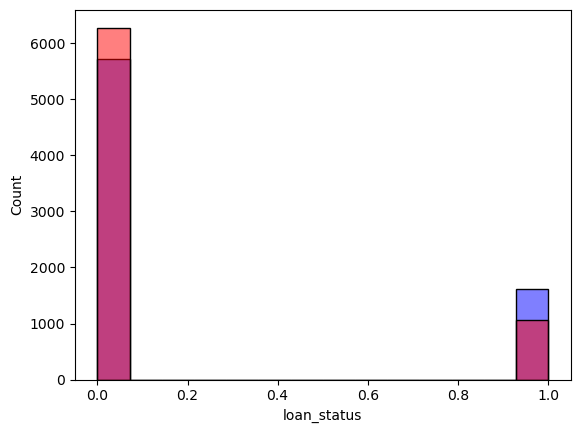

In [62]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [63]:
from sklearn import metrics
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

LogisticRegression_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.8558963871847307


### KNeighborsClassifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_predicted = classifier.predict(X_test_transformed)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df1.head()

KNeighborsClassifier()

,Actual,Predicted
16196,0,0
21058,0,1
635,1,1
15955,0,0
7237,0,0


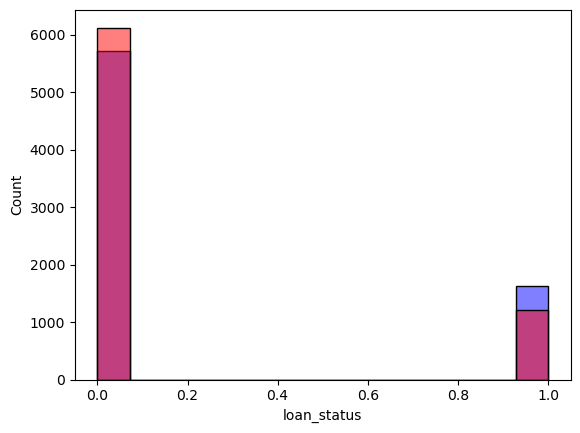

In [65]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [66]:
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

KNeighborsClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.8867075664621676


### DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

y_test_predicted = classifier.predict(X_test_transformed)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df2.head()

DecisionTreeClassifier()

,Actual,Predicted
16196,0,0
21058,0,0
635,1,1
15955,0,1
7237,0,0


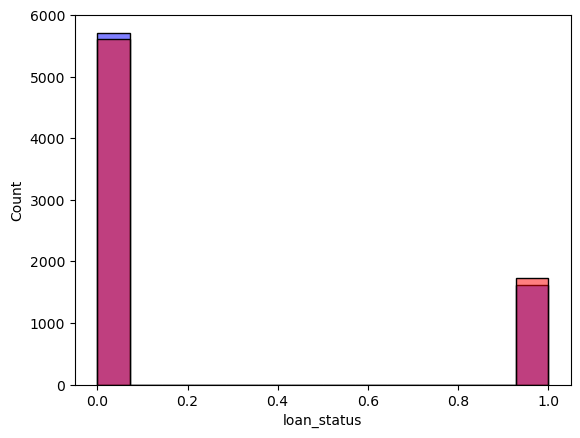

In [68]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [69]:
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

DecisionTreeClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.8895705521472392


### SupportVectorClassifier

In [70]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)

y_test_predicted = classifier.predict(X_test_transformed)

df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df3.head()

SVC()

,Actual,Predicted
16196,0,0
21058,0,0
635,1,1
15955,0,1
7237,0,0


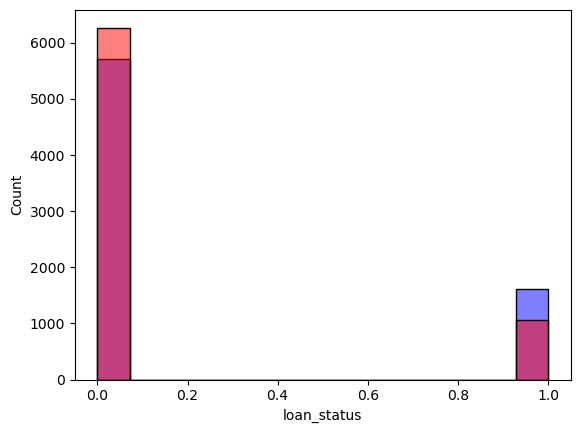

In [71]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [72]:
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))
SVC_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.8894342194955692


### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [74]:
y_test_predicted = classifier.predict(X_test_transformed)

df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df4.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

RandomForestClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
16196,0,0
21058,0,0
635,1,1
15955,0,0
7237,0,0


Mean accuracy score:  0.9318336741649625


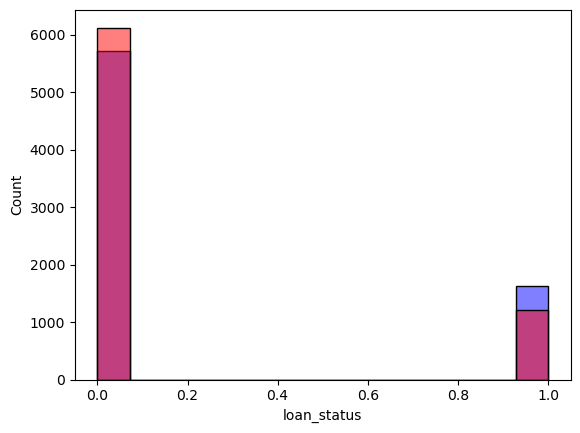

In [75]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

### ADA Boost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [77]:
y_test_predicted = classifier.predict(X_test_transformed)

df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df5.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

AdaBoostClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
16196,0,0
21058,0,0
635,1,1
15955,0,1
7237,0,0


Mean accuracy score:  0.8882072256305386


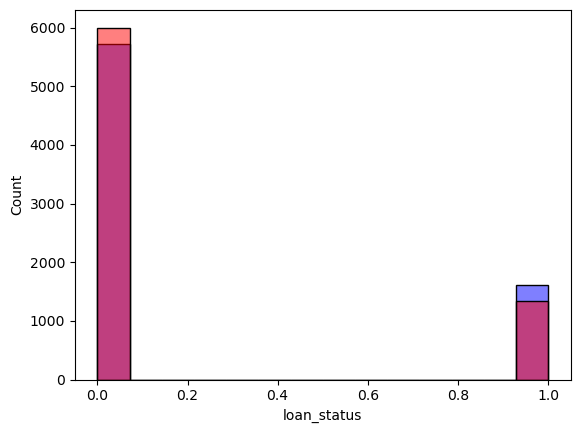

In [78]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

### GBDT(GradientBoostingClassifier) Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [80]:
y_test_predicted = classifier.predict(X_test_transformed)

df6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df6.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

GradientBoostingClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
16196,0,0
21058,0,0
635,1,1
15955,0,0
7237,0,0


Mean accuracy score:  0.9221540558963872


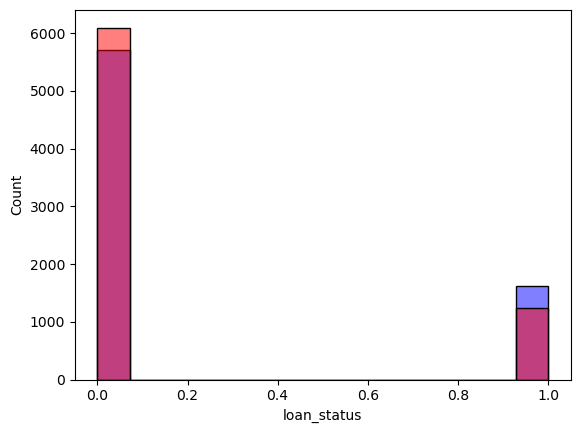

In [81]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

### Bagging Classifier

In [82]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(X_train_transformed, y_train)

BaggingClassifier()

In [83]:
y_test_predicted = classifier.predict(X_test_transformed)

df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df7.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

Bagging_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
16196,0,0
21058,0,0
635,1,1
15955,0,0
7237,0,0


Mean accuracy score:  0.9295160190865712


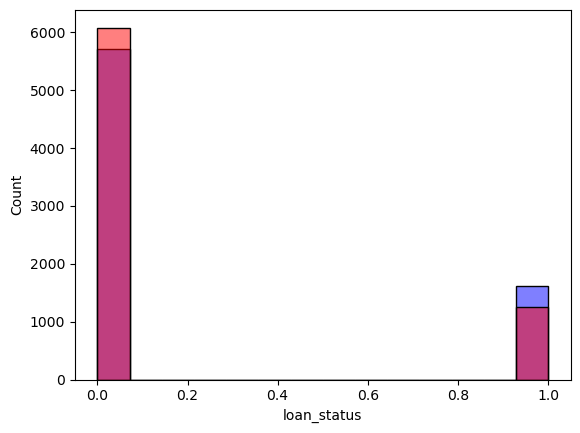

In [84]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [85]:
Results = pd.DataFrame({"Algorithm": ["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier", 
                                      "RandomForestClassifier", "Support Vector Classifier","GradientBoostingClassifier",
                                     "AdaBoostClassifier"],
                    "Accuracy_Score": [LogisticRegression_score, KNeighborsClassifier_score, DecisionTreeClassifier_score, 
                                       RandomForestClassifier_score, SVC_score, GradientBoostingClassifier_score,
                                       AdaBoostClassifier_score],
                     "Percentage": [LogisticRegression_score*100, KNeighborsClassifier_score*100, 
                                     DecisionTreeClassifier_score*100, RandomForestClassifier_score*100, SVC_score*100 , 
                                     GradientBoostingClassifier_score*100,AdaBoostClassifier_score*100]})

In [86]:
Results.Percentage = np.round(Results.Percentage,2).astype(str) + '%'

In [87]:
Results.sort_values(by="Accuracy_Score", ascending=False, ignore_index=True)

,Algorithm,Accuracy_Score,Percentage
0,RandomForestClassifier,0.931834,93.18%
1,GradientBoostingClassifier,0.922154,92.22%
2,DecisionTreeClassifier,0.889571,88.96%
3,Support Vector Classifier,0.889434,88.94%
4,AdaBoostClassifier,0.888207,88.82%
5,KNeighborsClassifier,0.886708,88.67%
6,LogisticRegression,0.855896,85.59%


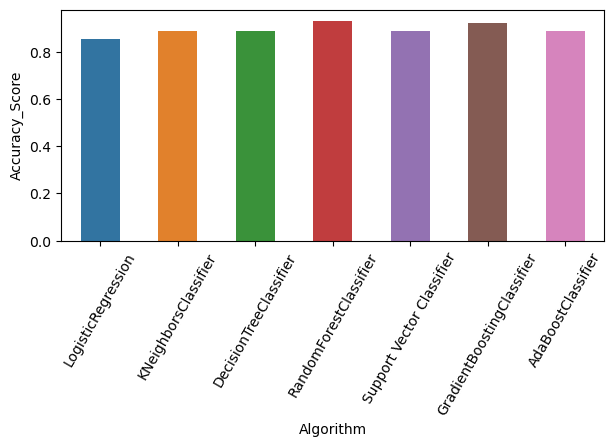

In [88]:
plt.figure(figsize=(7,3))
plt.xticks(rotation=60)
sns.barplot(x= Results.Algorithm, y=Results.Accuracy_Score,width=0.5);

## Conclusion:
### Based on the Exploratory Data Analysis we found an Interesting Insight 
- Comparing to the loan status and person income the non-loan defaulters has more person income compared to the loan defaulters.
- A-grade and B-grade are more compared to other grade.
- In the Homeimprovement sector non-loan defaulters has more person income compared other non-loan defaulters.
- In the Debtconsolidation loan defaulters has more person income compared to other loan defaulters.

### Resluts of the algorithms:
- By Performing all the algorithm to the churn perdiction ` RandomForestClassifier` and `GradientBoostingClassifier` are giving more accurate results compared to the all other algorithms.
- From the above results ` RandomForestClassifier`, `GradientBoostingClassifier`and `DecisionTreeClassifier` are giving `93.18%, 92.22% and 88.96%` accuracy.

## Model Buliding using Feature Selection

In [89]:
from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()

In [90]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_linear, n_features_to_select=8)

rfe = rfe.fit(X_train_transformed, y_train)

In [91]:
temp_df = pd.DataFrame({'Columns' : X_train_transformed.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,person_age,False,8
1,person_income,False,3
2,person_emp_length,False,10
3,loan_amnt,True,1
4,loan_int_rate,False,5
5,loan_percent_income,True,1
6,cb_person_cred_hist_length,False,9
7,person_home_ownership_OTHER,True,1
8,person_home_ownership_OWN,True,1
9,person_home_ownership_RENT,True,1


In [92]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [93]:
classifier.feature_importances_

array([0.04487778, 0.14141678, 0.06064123, 0.03934629, 0.05756365,
       0.23245846, 0.02652107, 0.00147215, 0.01013419, 0.128025  ,
       0.01291454, 0.0230884 , 0.02600052, 0.01718182, 0.0102683 ,
       0.00363015, 0.16445967])

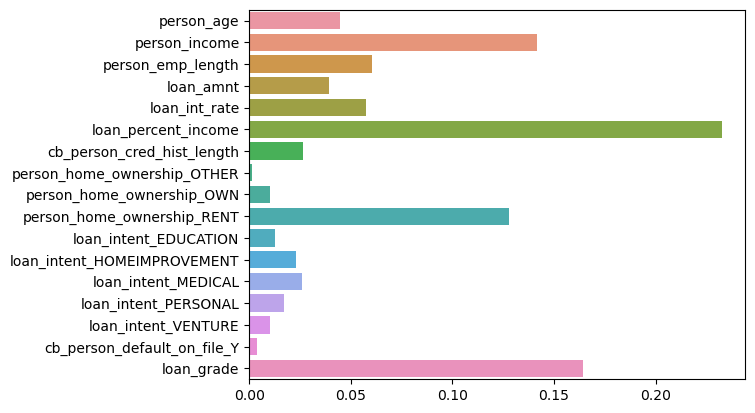

In [94]:
sns.barplot(x=classifier.feature_importances_, y=X_train_transformed.columns);

In [95]:
X_train_transformed.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y', 'loan_grade'],
      dtype='object')

In [96]:
X_train_transformed.drop(['person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y'], axis=1, inplace=True)

In [97]:
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade
29307,2.001717,-0.254088,-0.418257,2.335970,0.018992,2.232594,2.815681,6
512,-0.574206,-1.456429,-0.418257,-0.224133,0.959063,2.135957,-0.928030,5
6950,-0.413211,-0.238731,0.095786,0.710508,-0.431322,0.686402,-0.428869,6
6502,-0.735201,-0.254243,-0.418257,0.304142,-1.611341,0.299854,-0.428869,7
1641,-1.057192,-0.215463,-1.189321,-1.422911,1.527707,-1.342975,-0.428869,4


In [98]:
X_test_transformed.drop(['person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y'], axis=1, inplace=True)

In [99]:
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade
16196,-0.896197,2.266469,0.352807,0.710508,-1.624489,-0.666516,-0.678450,7
21058,0.552760,-0.102147,2.666000,-0.711772,-0.112487,-0.763153,-0.179288,6
635,-0.252216,-0.060497,0.866850,2.335970,0.410140,1.846046,-0.428869,6
15955,-0.574206,-1.921791,-0.675278,-1.524503,0.018992,-0.279968,-0.928030,5
7237,-0.896197,2.274225,-1.189321,-0.305406,-1.075566,-1.053064,-0.928030,7


In [100]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [104]:
y_test_predicted = classifier.predict(X_test_transformed)

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_test_predicted), sep='\n')

Mean accuracy score:  0.8388548057259714
Confusion Matrix: 
[[5451  264]
 [ 918  702]]


In [105]:
print('Classification report: ', metrics.classification_report(y_test, y_test_predicted), sep='\n')

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5715
           1       0.73      0.43      0.54      1620

    accuracy                           0.84      7335
   macro avg       0.79      0.69      0.72      7335
weighted avg       0.83      0.84      0.82      7335



In [106]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [107]:
y_test_predicted = classifier.predict(X_test_transformed)

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_test_predicted), sep='\n')

Mean accuracy score:  0.8340831629175187
Confusion Matrix: 
[[5103  612]
 [ 605 1015]]


In [108]:
print('Classification report: ', metrics.classification_report(y_test, y_test_predicted), sep='\n')

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5715
           1       0.62      0.63      0.63      1620

    accuracy                           0.83      7335
   macro avg       0.76      0.76      0.76      7335
weighted avg       0.83      0.83      0.83      7335



In [109]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [110]:
y_test_predicted = classifier.predict(X_test_transformed)

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_test_predicted), sep='\n')

Mean accuracy score:  0.8850715746421268
Confusion Matrix: 
[[5442  273]
 [ 570 1050]]


In [111]:
print('Classification report: ', metrics.classification_report(y_test, y_test_predicted), sep='\n')

Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5715
           1       0.79      0.65      0.71      1620

    accuracy                           0.89      7335
   macro avg       0.85      0.80      0.82      7335
weighted avg       0.88      0.89      0.88      7335



In [112]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [113]:
y_test_predicted = classifier.predict(X_test_transformed)

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_test_predicted), sep='\n')

Mean accuracy score:  0.8451261077027948
Confusion Matrix: 
[[5512  203]
 [ 933  687]]


In [114]:
print('Classification report: ', metrics.classification_report(y_test, y_test_predicted), sep='\n')

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5715
           1       0.77      0.42      0.55      1620

    accuracy                           0.85      7335
   macro avg       0.81      0.69      0.73      7335
weighted avg       0.84      0.85      0.83      7335



In [115]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [116]:
y_test_predicted = classifier.predict(X_test_transformed)

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))
print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_test_predicted), sep='\n')

Mean accuracy score:  0.8684389911383776
Confusion Matrix: 
[[5345  370]
 [ 595 1025]]


In [117]:
print('Classification report: ', metrics.classification_report(y_test, y_test_predicted), sep='\n')

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5715
           1       0.73      0.63      0.68      1620

    accuracy                           0.87      7335
   macro avg       0.82      0.78      0.80      7335
weighted avg       0.86      0.87      0.86      7335



### Resluts of the algorithms:
- By Performing all the algorithm after performing the feature selection ` RandomForestClassifier` and `GradientBoostingClassifier` are giving more accurate results compared to the all other algorithms.